## Ⅰ. 확률변수

확률변수는 확률분포 $\mathscr{D}$에 따라 이산형 확률변수와 연속형 확률변수로 구분할 수 있다.

### 1. 이산형 확률변수
이산형 확률변수는 확률변수가 가질 수 있는 모든 경우의 수를 고려하여 확률을 더해서 모델링한다.

$$
P(X \in A) = \sum_{\mathbf{x} \in A}P(X = \mathbf{x})
$$

### 2. 연속형 확률변수

연속형 확률변수는 데이터 공간에 정의된 확률변수의 밀도 위에서의 적분을 통해 모델링한다.
$$
P(X \in A)=\int_{A} P(\mathbf{x}) \mathrm{d} \mathbf{x}
$$

## Ⅱ. 결합분포

데이터 공간을 $\mathscr{X} \times \mathscr{Y}$ 라면 $\mathscr{D}$는 데이터 공간에서 데이터를 추출하는 확률분포로 $P(\mathbf{x}, \mathbf{y})$ 로 표시할수 있다.  
주변확률분포 $P(\mathbf{x})$ 는 결합분포로부터 유도할 수 있다.

$$
P(\mathbf{x}) = \sum_{\mathbf{y}} P(\mathbf{x}, \mathbf{y})\\
P(\mathbf{x}) = \int_{\mathscr{Y}} P(\mathbf{x}, y)dy
$$


## 조건부 확률

조건부확률분포 $P(\mathbb{x}|y)$는 $y$가 주어진 조건에서의 확률분포를 나타낸다.  
회귀문제에서 


## 기대값

확률분포가 주어지면 데이터를 분석하는데 사용가능한 여러 종류의 **통계적 범함수** 를 계산할 수 있다.  
기대값은 확률분포를 통해 통계적 범함수를 계산하는데 사용한다.

$$
\mathbb{E}_{\mathbf{x} \sim P(\mathbf{x})}[f(\mathbf{x})]=\int_{\mathcal{X}} f(\mathbf{x}) P(\mathbf{x}) \mathrm{d} \mathbf{x}, \quad \mathbb{E}_{\mathbf{x} \sim P(\mathbf{x})}[f(\mathbf{x})]=\sum_{\mathbf{x} \in \mathcal{X}} f(\mathbf{x}) P(\mathbf{x})
$$

기대값을 통해 평균, 분산, 공분산 등 여러 통계량을 계산할 수 있다.

회귀문제에서는 조건부기대값 $\mathbb{E}[y \mid \mathbf{x}]$ 를 추정하고
분류문제에서는 조건부확률 $P(y \mid \mathbf{x})$ 를 계산한다.

## 몬테카를로 샘플링

확률분포를 알지 못할때 데이터를 이용하여 기대값을 계산할 수 있다. 이를 몬테카를로 샘플링 방법이라 하며 확률분포가 이산형일때와 연속형일때 모두 사용할 수 있다.

$$
\mathbb{E}_{\mathbf{x} \sim P(\mathbf{x})}[f(\mathbf{x})] \approx \frac{1}{N} \sum_{i=1}^{N} f\left(\mathbf{x}^{(i)}\right), \quad \mathbf{x}^{(i)} \stackrel{\mathrm{i} .\mathrm{i} . \mathrm{d} .}{\sim} P(\mathbf{x})
$$

아래는 몬테카를로 샘플링 방법을 이용하여 반지름이 4인 반원의 높이의 기대값을 구하는 과정이다. 이 결과값은 $\pi$와 일치한다.

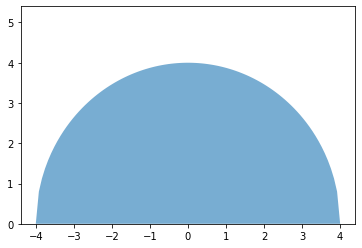

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def circle(x):
    return np.sqrt(16 - x**2)

x = np.linspace(-4, 4, 100)
plt.ylim(0, 5.4)
plt.fill_between(x, circle(x), alpha=0.6)
plt.show()

In [56]:
x = np.random.uniform(-4, 4, 10000)
y = circle(x)
print(f'{y.mean()} \u00B1 {y.std()/100}')

3.1348420367741063 ± 0.008924210435442882


## 중심극한정리

통계량의 확률분포를 **표집분포** 라고 부르며 통계량이 평균과 분산인 경우 다음과 같이 구할 수 있다.

$$
\bar{X}=\frac{1}{N} \sum_{i=1}^{N} X_{i} \quad S^{2}=\frac{1}{N-1} \sum_{i=1}^{N}\left(X_{i}-\bar{X}\right)^{2}
$$

특히 표본평균의 표집분포는 N이 충분히 크면 정규분포 $\mathcal{N}\left(\mu, \sigma^{2} / N\right)$ 를 따른다. 이는 모집단의 분포가 정규분포를 따르지 않아도 성립한다.

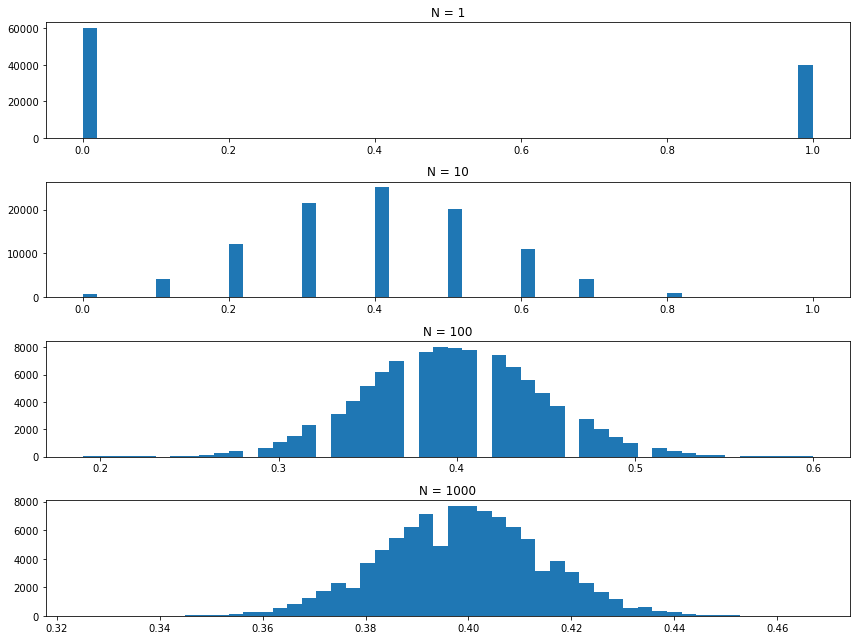

In [89]:
x = np.random.binomial(1, 0.4, 100000)
fig, axes = plt.subplots(4, 1, figsize=(12,9))
for N, ax in zip([1, 10, 100, 1000], axes):
    ax.hist([np.random.choice(x, N).mean() for _ in range(100000)], bins=50)
    ax.set_title(f'N = {N}')

#plt.figure(figsize = (14, 15))
plt.tight_layout()
plt.show()

## 최대가능도 추정법

최대가능도 추정법은 가능도 함수를 통해 이론적으로 가장 가능성이 높은 모수를 추정하는 방법이다.

$$
\hat{\theta}_{\mathrm{MLE}}=\underset{\theta}{\operatorname{argmax}} L(\theta ; \mathbf{x})=\underset{\theta}{\operatorname{argmax}} P(\mathbf{x} \mid \theta)
$$

데이터 집합 X가 독립적으로 추출되었을 경우 정확도와 계산의 효율성의 위해 로그가능도함수를 최적화한다.

$$
L(\theta ; \mathbf{X})=\prod_{i=1}^{n} P\left(\mathbf{x}_{i} \mid \theta\right) \quad \Rightarrow \quad \log L(\theta ; \mathbf{X})=\sum_{i=1}^{n} \log P\left(\mathbf{x}_{i} \mid \theta\right)
$$

### 1. 정규분포에서의 예시

정규분포를 따르는 확률변수 X로부터 독립적인 표본 {x1, x2, ..., xn} 을 얻었을 경우,

$$
\log L(\theta ; \mathbf{X})=\sum_{i=1}^{n} \log P\left(x_{i} \mid \theta\right)=\sum_{i=1}^{n} \log \frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{\left|x_{i}-\mu\right|^{2}}{2 \sigma^{2}}} = 
-\frac{n}{2} \log 2 \pi \sigma^{2}-\sum_{i=1}^{n} \frac{\left|x_{i}-\mu\right|^{2}}{2 \sigma^{2}}
$$

이를 $\mu$ 와 $\sigma$ 에 대해 미분을 하여 0이 되는 값을 찾으면 다음과 같은 값을 얻을 수 있다.

$$
\begin{aligned}
\hat{\mu}_{\mathrm{MLE}} &=\frac{1}{n} \sum_{i=1}^{n} x_{i} \\
\hat{\sigma}_{\mathrm{MLE}}^{2} &=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\mu\right)^{2}
\end{aligned}
$$

### 2. 카테고리분포에서의 예시

카테고리분포를 따르는 확률변수 multinoulli(x; p1, p2, ..., pd)로부터 독립적인 표본 {x1, x2, ..., xn} 을 얻었을 경우,

$$
\log L(\theta ; \mathbf{X})=\sum_{i=1}^{n} \log P\left(x_{i} \mid \theta\right)= \sum_{k=1}^d n_k \log p_k , \quad
\sum_{k=1}^d p_k = 1
$$

이는 라그랑주 승수법을 통해 최적화를 할 수 있다.

$$
\begin{aligned}
&\mathcal{L}(p_1, ..., p_k, \lambda) = \sum_{k=1}^d n_k \log p_k + \lambda (1 - \sum_{k=1}^d p_k) \\
&\frac{\partial \mathcal{L}}{\partial p_k} = \frac{n_k}{p_k} - \lambda = 0, \quad
\frac{\partial \mathcal{L}}{\partial \lambda} = 1 - \sum_{k=1}^d p_k = 0\\
&\Rightarrow p_k = \frac{n_k}{n}
\end{aligned}
$$

## 쿨백-라이블러 발산

데이터공간에 두개의 확률분포 $P(\mathbf{X}), Q(\mathbf{X})$가 있을 경우 두 확률분포 사이의 거리를 계산할 때 사용할 수 있다.

$$
\mathbb{K L}(P \| Q)=\sum_{\mathbf{x} \in \mathcal{X}} P(\mathbf{x}) \log \left(\frac{P(\mathbf{x})}{Q(\mathbf{x})}\right) \quad \mathbb{K L}(P \| Q)=\int_{X} P(\mathbf{x}) \log \left(\frac{P(\mathbf{x})}{Q(\mathbf{x})}\right) \mathrm{d} \mathbf{x}
$$

이는 다음과 같이 크로스 엔트로피와 엔트로피 두항으로 분리할 수 있다.

$$
\mathbb{K L}(P \| Q) = -\mathbb{E}_{\mathbf{x} \sim P\left(\mathbf{X}\right)}[\log Q(\mathbf{x})]
+ \mathbb{E}_{\mathbf{x} \sim P\left(\mathbf{X}\right)}[\log P(\mathbf{x})]
$$

분류 문제에서 정답레이블을 P, 모델 예측을 Q라 두면 최대가능도 추정법은 쿨벡-라이블러 발산을 최소화하는 것과 같다.

## 베이즈 정리

조건부확률은 사건 B가 일어난 상황에서 사건 A가 일어날 확률이다. 베이즈 정리는 조건부확률을 이용하여 정보를 갱신하는 방식을 알려준다.

$$
P(A | B) = P(A)\frac{P( B | A )}{P(B)}
$$